Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier

Loading dataset

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
114957,73690,-2.197480,1.982629,0.259502,0.924323,-0.879938,-0.135952,-0.380186,0.611134,0.278764,...,-0.033516,-0.367199,-0.099698,-0.111166,-0.182825,0.427261,-0.895134,0.164611,9.51,0.0
114958,73690,-2.197480,1.982629,0.259502,0.924323,-0.879938,-0.135952,-0.380186,0.611134,0.278764,...,-0.033516,-0.367199,-0.099698,-0.111166,-0.182825,0.427261,-0.895134,0.164611,9.51,0.0
114959,73690,1.255655,0.293362,0.288616,0.701727,-0.447134,-1.093442,0.029565,-0.155947,0.160172,...,-0.297287,-0.898954,0.139494,0.322281,0.187536,0.097228,-0.028586,0.029014,1.79,0.0
114960,73690,1.270638,-0.089535,-0.990690,-0.375303,0.652307,-0.073908,0.394543,-0.164288,-0.317251,...,-0.067492,-0.344301,-0.372630,-1.296908,0.731021,1.152123,-0.131651,-0.024591,75.00,0.0
114961,73691,1.295784,0.049457,-1.301814,-0.476648,2.131357,3.184446,-0.494416,0.802781,-0.075014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114962 entries, 0 to 114961
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    114962 non-null  int64  
 1   V1      114962 non-null  float64
 2   V2      114962 non-null  float64
 3   V3      114962 non-null  float64
 4   V4      114962 non-null  float64
 5   V5      114962 non-null  float64
 6   V6      114962 non-null  float64
 7   V7      114962 non-null  float64
 8   V8      114962 non-null  float64
 9   V9      114962 non-null  float64
 10  V10     114962 non-null  float64
 11  V11     114962 non-null  float64
 12  V12     114961 non-null  float64
 13  V13     114961 non-null  float64
 14  V14     114961 non-null  float64
 15  V15     114961 non-null  float64
 16  V16     114961 non-null  float64
 17  V17     114961 non-null  float64
 18  V18     114961 non-null  float64
 19  V19     114961 non-null  float64
 20  V20     114961 non-null  float64
 21  V21     11

In [6]:
df.shape

(114962, 31)

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,114962.000000,114962.000000,114962.000000,114962.000000,114962.000000,114962.000000,114962.000000,114962.000000,114962.000000,114962.000000,...,114961.000000,114961.000000,114961.000000,114961.000000,114961.000000,114961.000000,114961.000000,114961.000000,114961.000000,114961.000000
mean,46081.803161,-0.254307,-0.014474,0.680756,0.155588,-0.283222,0.093060,-0.115141,0.059054,-0.069232,...,-0.033882,-0.110877,-0.036393,0.011090,0.132304,0.026724,0.001019,0.002058,94.910872,0.002105
std,18497.491852,1.840512,1.635453,1.299923,1.337298,1.336326,1.295536,1.195872,1.228304,1.100380,...,0.736144,0.638775,0.615475,0.595142,0.438953,0.490939,0.390720,0.317051,257.019966,0.045833
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,35135.000000,-1.021267,-0.588758,0.175474,-0.706585,-0.904592,-0.650548,-0.603510,-0.133980,-0.702130,...,-0.225051,-0.539090,-0.175476,-0.324119,-0.131773,-0.323044,-0.060932,-0.004723,6.950000,0.000000
50%,47926.000000,-0.262408,0.085671,0.755424,0.183498,-0.316178,-0.160504,-0.067892,0.077774,-0.134436,...,-0.057871,-0.088085,-0.048507,0.067072,0.169540,-0.065767,0.010666,0.023424,25.000000,0.000000
75%,61141.750000,1.155544,0.750077,1.377493,1.016309,0.243646,0.484423,0.411121,0.369380,0.517444,...,0.118275,0.309164,0.081435,0.408176,0.420138,0.293114,0.084748,0.077098,85.440000,0.000000
max,73691.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,27.202839,10.503090,19.002942,4.016342,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


In [8]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


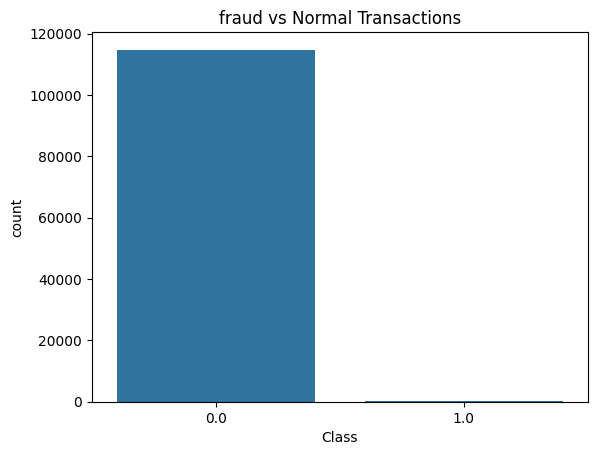

In [13]:
sns.countplot(x='Class', data=df)
plt.title("fraud vs Normal Transactions")
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

In [17]:
df_cleaned = df.dropna(subset=['Class'])
x = df_cleaned.drop('Class', axis=1)
y = df_cleaned['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [18]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9985792571544551
[[34401    15]
 [   34    39]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     34416
         1.0       0.72      0.53      0.61        73

    accuracy                           1.00     34489
   macro avg       0.86      0.77      0.81     34489
weighted avg       1.00      1.00      1.00     34489



In [22]:
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0].sample(len(fraud))

balanced_df = pd.concat([fraud, valid])

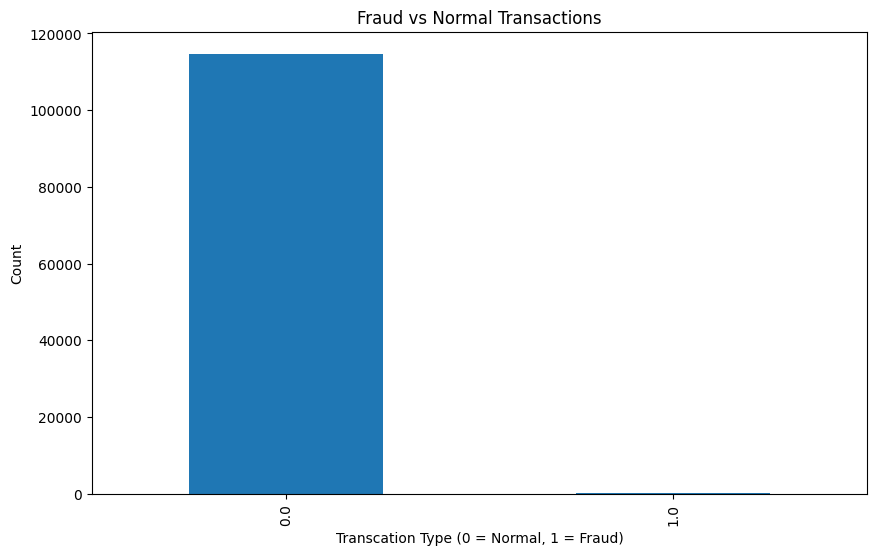

In [23]:
plt.figure(figsize=(10, 6))
df['Class'].value_counts().plot(kind='bar')
plt.title("Fraud vs Normal Transactions")
plt.xlabel("Transcation Type (0 = Normal, 1 = Fraud)")
plt.ylabel("Count")
plt.show()


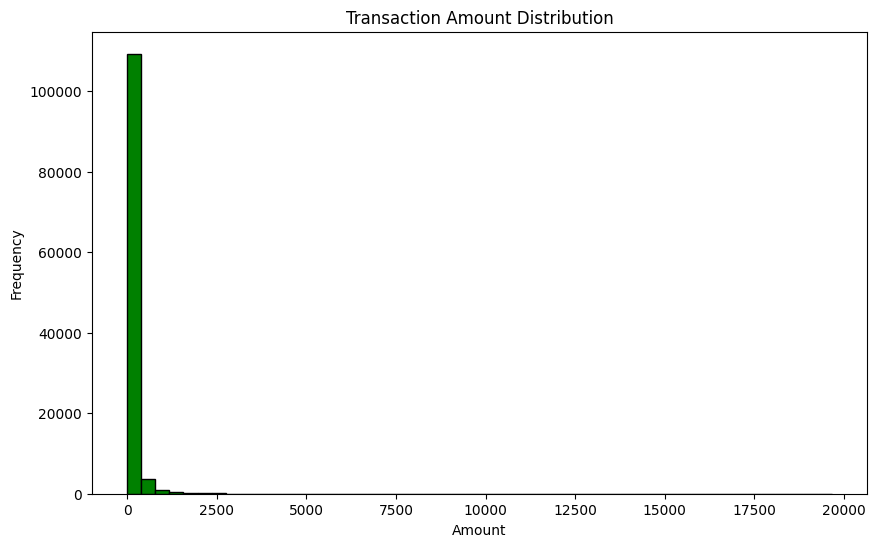

In [25]:
plt.figure(figsize=(10,6))
plt.hist(df['Amount'], bins=50, color='green', edgecolor='black')
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()


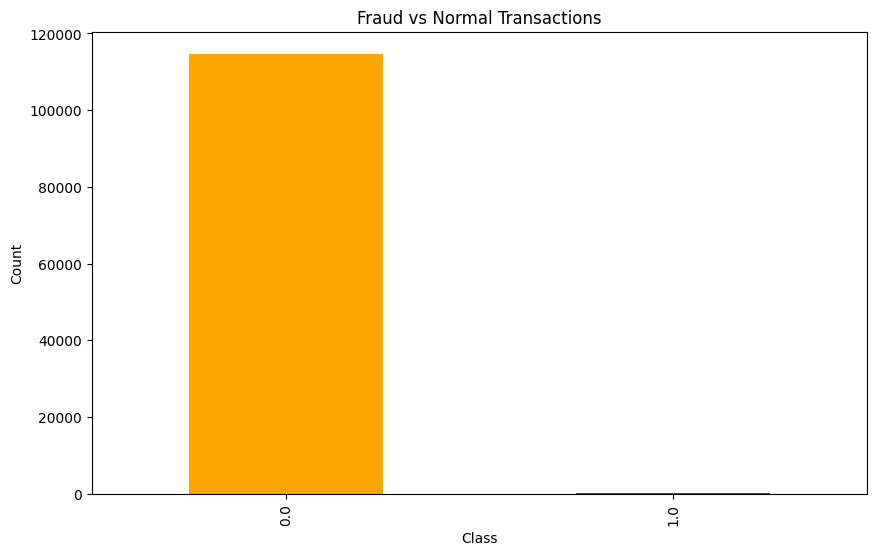

In [28]:
plt.figure(figsize=(10,6))
df['Class'].value_counts().plot(kind='bar', color=['orange', 'red'])
plt.title("Fraud vs Normal Transactions")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

Analyzing Class Distribution

In [10]:
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))

0.0021095023492185253
Fraud Cases: 242
Valid Transactions: 114719


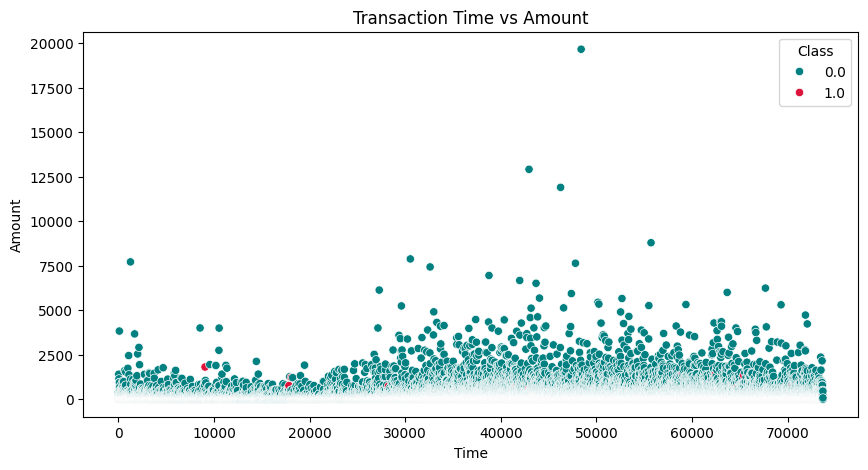

In [30]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=df, palette={0:'teal', 1:'crimson'})

plt.title("Transaction Time vs Amount")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

Exploring Transaction Amounts

In [11]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


,Amount
count,242.000000
mean,119.435331
std,254.330814
min,0.000000
25%,1.000000
50%,8.565000
75%,99.990000
max,1809.680000


In [12]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


,Amount
count,114719.000000
mean,94.859137
std,257.024232
min,0.000000
25%,6.990000
50%,25.000000
75%,85.250000
max,19656.530000


Plotting Correlation Matrix

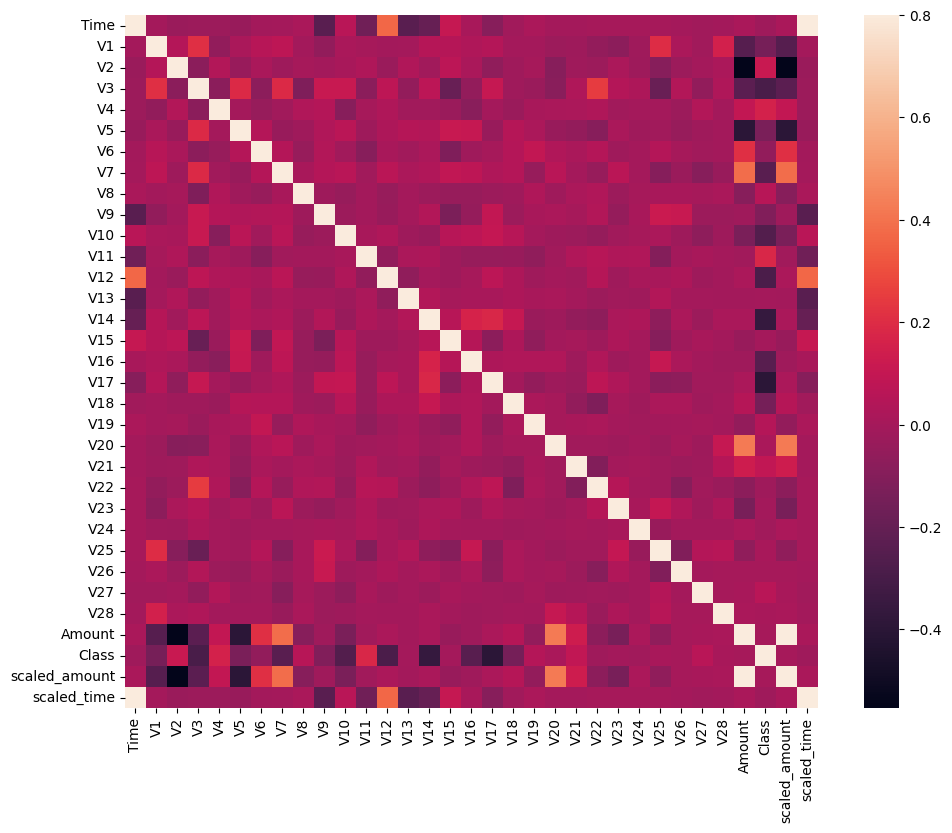

In [32]:
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

Preparing Data

In [36]:
X = df_cleaned.drop(['Class'], axis = 1)
Y = df_cleaned["Class"]
print(X.shape)
print(Y.shape)

xData = X.values
yData = Y.values

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

(114961, 32)
(114961,)


Building and Training the Model

In [38]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)

yPred = rfc.predict(xTest)

Evaluating the Model

Model Evaluation Metrics:
Accuracy: 0.9995
Precision: 1.0000
Recall: 0.7755
F1-Score: 0.8736
Matthews Correlation Coefficient: 0.8804


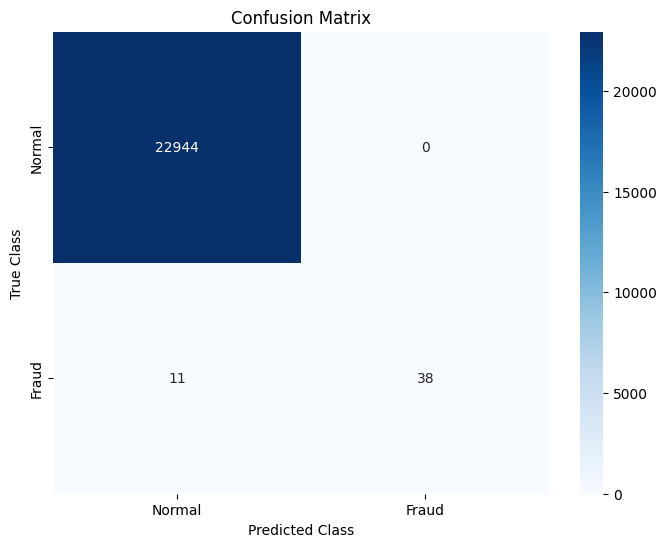

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
accuracy = accuracy_score(yTest, yPred)
precision = precision_score(yTest, yPred)
recall = recall_score(yTest, yPred)
f1 = f1_score(yTest, yPred)
mcc = matthews_corrcoef(yTest, yPred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()